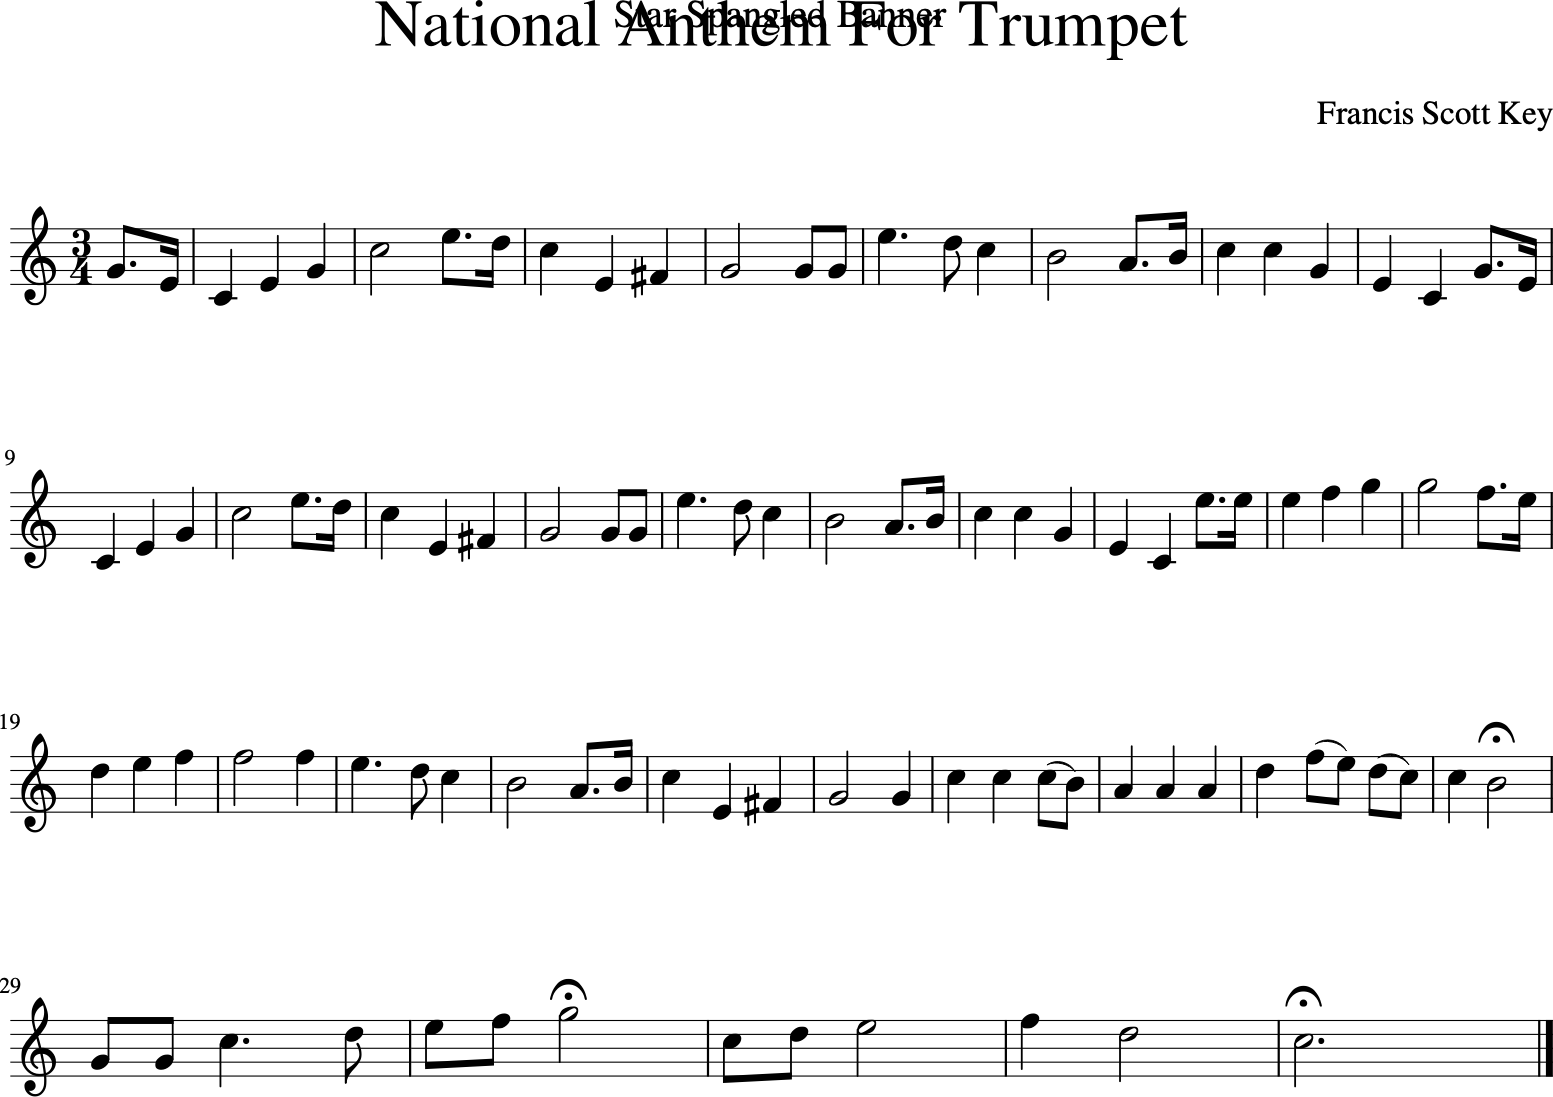

In [1]:
from music21 import *

b = converter.parse('/Users/sagewong/git/SightReadingMusicGenerator/national-anthem-for-trumpet.mxl')
b.show()

In [2]:
def stepDirectionAndLength(currNote, prevNote):
    if len(currNote) == 2:
        currLetter = currNote[0]
        currVal = (ord(currLetter) - 65) + int(currNote[1])*7
    elif len(currNote) == 3:
        currLetter = currNote[0]
        currAccidental = currNote[1]
        if currAccidental == "#":
            currVal = (ord(currLetter) - 65) + int(currNote[2])*7 + 0.5
        else:
            currVal = (ord(currLetter) - 65) + int(currNote[2])*7 - 0.5

    if len(prevNote) == 2:
        prevLetter = prevNote[0]
        prevVal = (ord(prevLetter) - 65) + int(prevNote[1])*7
    elif len(prevNote) == 3:
        prevLetter = prevNote[0]
        prevAccidental = prevNote[1]
        if prevAccidental == "#":
            prevVal = (ord(prevLetter) - 65) + int(prevNote[2])*7 + 0.5
        else:
            prevVal = (ord(prevLetter) - 65) + int(prevNote[2])*7 - 0.5

    if currVal > prevVal:
        stepDirection = 1
    elif currVal < prevVal:
        stepDirection = -1
    else:
        stepDirection = 0
    
    stepLength = currVal - prevVal
    return stepDirection, stepLength

previousNote = ''

allStepDirections = []
allStepLengths = []

for n in b.recurse().notes:
    print(n.nameWithOctave, n.quarterLength)
    currentNote = n.nameWithOctave

    if previousNote != '':
        print(currentNote)
        stepDirection, stepLength = stepDirectionAndLength(currentNote, previousNote)
        allStepDirections.append(stepDirection)
        allStepLengths.append(stepLength)
        print(f"step direction: {stepDirection}")
        print(f"step length: {stepLength}")

    previousNote = n.nameWithOctave

G4 0.75
E4 0.25
E4
step direction: -1
step length: -2
C4 1.0
C4
step direction: -1
step length: -2
E4 1.0
E4
step direction: 1
step length: 2
G4 1.0
G4
step direction: 1
step length: 2
C5 2.0
C5
step direction: 1
step length: 3
E5 0.75
E5
step direction: 1
step length: 2
D5 0.25
D5
step direction: -1
step length: -1
C5 1.0
C5
step direction: -1
step length: -1
E4 1.0
E4
step direction: -1
step length: -5
F#4 1.0
F#4
step direction: 1
step length: 1.5
G4 2.0
G4
step direction: 1
step length: 0.5
G4 0.5
G4
step direction: 0
step length: 0
G4 0.5
G4
step direction: 0
step length: 0
E5 1.5
E5
step direction: 1
step length: 5
D5 0.5
D5
step direction: -1
step length: -1
C5 1.0
C5
step direction: -1
step length: -1
B4 2.0
B4
step direction: -1
step length: -8
A4 0.75
A4
step direction: -1
step length: -1
B4 0.25
B4
step direction: 1
step length: 1
C5 1.0
C5
step direction: 1
step length: 8
C5 1.0
C5
step direction: 0
step length: 0
G4 1.0
G4
step direction: -1
step length: -3
E4 1.0
E4
step 

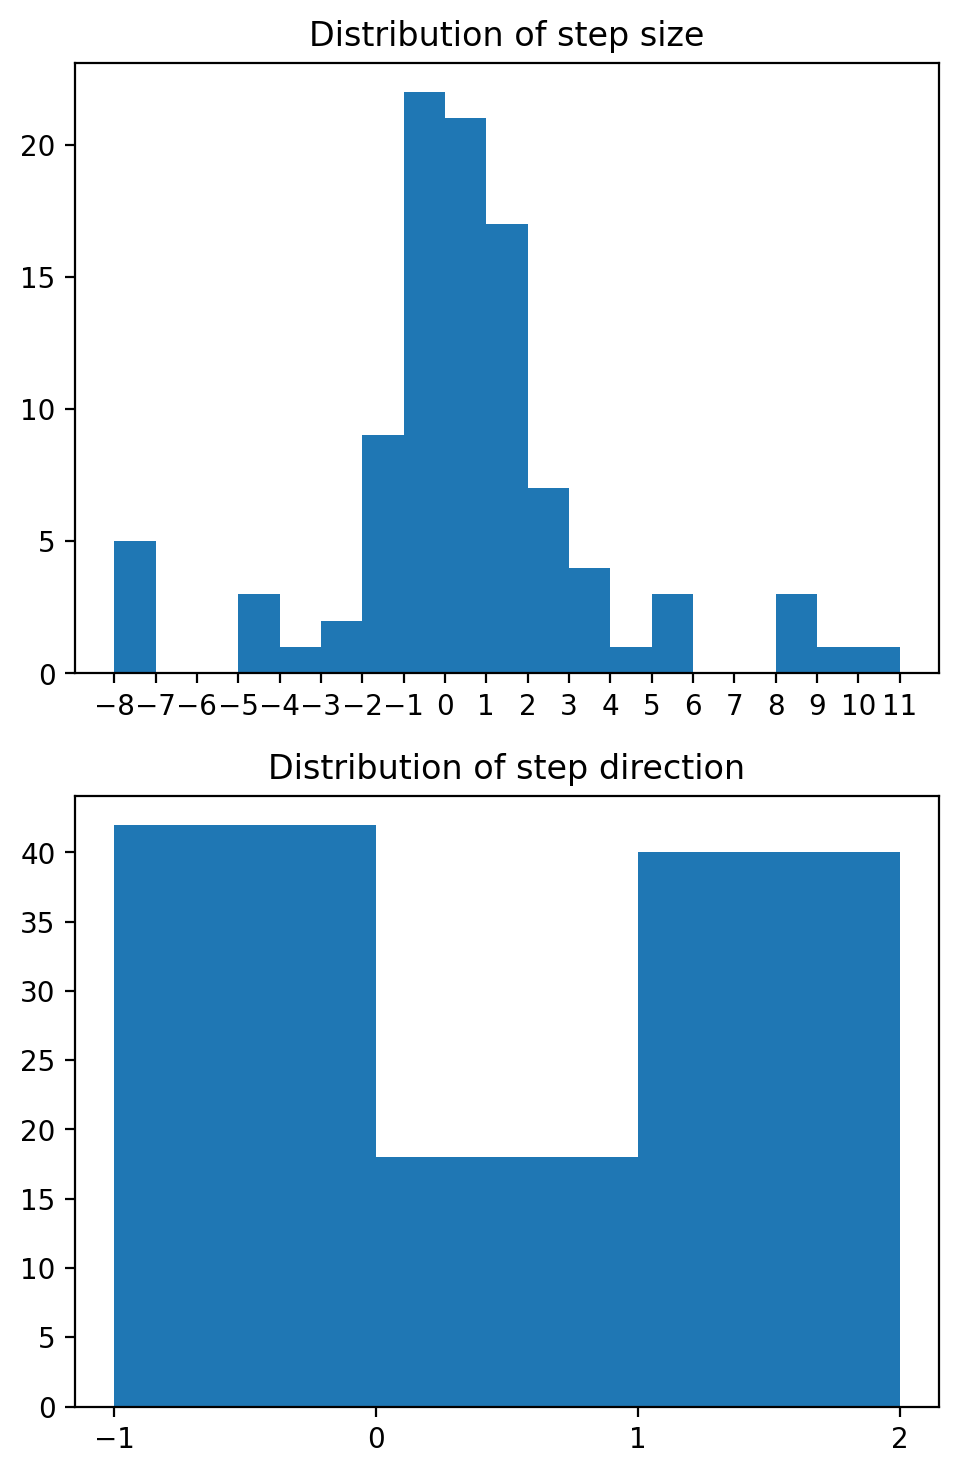

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)

allStepLengthsArray = np.array(allStepLengths)
allStepDirectionsArray = np.array(allStepDirections)

axes[0].set_xticks(range(-10, 12))
axes[0].hist(allStepLengthsArray, bins=[i for i in range(int(np.min(allStepLengthsArray)), int(np.max(allStepLengthsArray)) + 2)])
axes[0].set_title("Distribution of step size")

axes[1].set_xticks(range(-10, 10))
axes[1].hist(allStepDirectionsArray, bins=[i for i in range(int(np.min(allStepDirectionsArray)), int(np.max(allStepDirectionsArray)) + 2)])
axes[1].set_title("Distribution of step direction")

plt.subplots_adjust(bottom=0.1, right=0.8, top=1.5)

In [12]:
def elementPercentChance(arr):
    emptyDict = {}
    arr = list(arr)
    arrLen = len(arr)
    while len(arr) > 0:
        elementToCount = arr[0]
        howManyOccurrences = 0
        index = 0
        while index < len(arr):
            if arr[index] == elementToCount:
                arr.pop(index)
                index -= 1
                howManyOccurrences += 1
            index += 1
        emptyDict.update({elementToCount:howManyOccurrences/arrLen})
    return emptyDict

stepLengthChanceDict = elementPercentChance(allStepLengthsArray)
stepDirectionChanceDict = elementPercentChance(allStepDirectionsArray)

In [ ]:
def generateListOfNotes():
    listONotes = []
    for octave in range(1, 8):
        for note in range(65, 72):
            listONotes.append(chr(note) + str(octave))
    return listONotes

def randomlySelectChance(chanceDict):
    for key, value in chanceDict.vals
    return chanceDict
ListONotes = generateListOfNotes()

currIndex = 23

ListONotes[currIndex]
print(randomlySelectChance(stepLengthChanceDict))

{-2.0: 0.09, 2.0: 0.07, 3.0: 0.04, -1.0: 0.22, -5.0: 0.03, 1.5: 0.03, 0.5: 0.03, 0.0: 0.18, 5.0: 0.03, -8.0: 0.05, 1.0: 0.14, 8.0: 0.03, -3.0: 0.02, 4.0: 0.01, 9.0: 0.01, 10.0: 0.01, -4.0: 0.01}
